In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, mannwhitneyu, wilcoxon, pearsonr, spearmanr, kstest, chi2
import pingouin as pg


### To note, the DDM data here are the preliminary results

In [164]:
# read DDM data
ddm_risk = pd.read_csv('/Users/hutianqi/Desktop/Project Smith Fitting/01 DDM Fitting/Z3_Fitting_Refs/SK_risk_ddm_ref_2.csv')
addm_risk = pd.read_csv('/Users/hutianqi/Desktop/Project Smith Fitting/01 DDM Fitting/Z3_Fitting_Refs/SK_risk_addm_ref_2.csv')
ddm_social = pd.read_csv('/Users/hutianqi/Desktop/Project Smith Fitting/01 DDM Fitting/Z3_Fitting_Refs/SK_social_ddm_ref_2.csv')
addm_social = pd.read_csv('/Users/hutianqi/Desktop/Project Smith Fitting/01 DDM Fitting/Z3_Fitting_Refs/SK_social_addm_ref_2.csv')


In [165]:
ddm_risk.columns

Index(['SubjectNumber', 'model', 'd', 'rho', 'B', 'x0', 'x0_abs', 'nondectime',
       'loss_func_value', 'criterion', 'sample_size', 'on_bound_valid',
       'on_bound_invalid'],
      dtype='object')

In [166]:
addm_risk.columns

Index(['SubjectNumber', 'model', 'd', 'rho', 'theta', 'nondectime', 'B', 'x0',
       'x0_abs', 'loss_func_value', 'criterion', 'sample_size',
       'on_bound_valid', 'on_bound_invalid'],
      dtype='object')

In [167]:
ddm_social.columns

Index(['SubjectNumber', 'model', 'd', 'alpha', 'beta', 'B', 'x0', 'x0_abs',
       'nondectime', 'loss_func_value', 'criterion', 'sample_size',
       'on_bound_valid', 'on_bound_invalid'],
      dtype='object')

In [168]:
addm_social.columns

Index(['SubjectNumber', 'model', 'd', 'alpha', 'beta', 'theta', 'nondectime',
       'B', 'x0', 'x0_abs', 'loss_func_value', 'criterion', 'sample_size',
       'on_bound_valid', 'on_bound_invalid'],
      dtype='object')

In [169]:
# setting parameters for plotting:
label_size = 16
tick_size = 12
title_size = 18
dpi=100

# Within-domain patterns

## Normality test
To note, because none of the variables of interests follow the normal distribution, nonparametric methods should be favoured in the following analysis.

In [170]:
kstest(ddm_risk['x0_abs'], 'norm')

KstestResult(statistic=0.5031796162978742, pvalue=5.822940276287927e-09)

In [171]:
kstest(addm_risk['x0_abs'], 'norm')

KstestResult(statistic=0.5008532737639951, pvalue=7.0590680388486515e-09)

In [172]:
kstest(ddm_social['x0_abs'], 'norm')

KstestResult(statistic=0.5001329892777552, pvalue=7.490845727315158e-09)

In [173]:
kstest(addm_social['x0_abs'], 'norm')

KstestResult(statistic=0.505367789754575, pvalue=4.853336126216068e-09)

## Correlational analysis

In [174]:
# risk
print('PearsonrResult', pearsonr(ddm_risk['x0_abs'], addm_risk['x0_abs']))
print(spearmanr(ddm_risk['x0_abs'], addm_risk['x0_abs']))


PearsonrResult (0.8976305335004088, 1.2009961964223896e-13)
SpearmanrResult(correlation=0.8368082368082369, pvalue=2.043193108060161e-10)


In [175]:
# social
print('PearsonrResult', pearsonr(ddm_social['x0_abs'], addm_social['x0_abs']))
print(spearmanr(ddm_social['x0_abs'], addm_social['x0_abs']))


PearsonrResult (0.8932883691330878, 2.3512313723562124e-13)
SpearmanrResult(correlation=0.8653796653796654, pvalue=9.767085183376899e-12)


## Paired samples analysis

In [176]:
# risk
print(ddm_risk['x0_abs'].mean(), ddm_risk['x0_abs'].std())
print(addm_risk['x0_abs'].mean(), addm_risk['x0_abs'].std())
print(ttest_rel(ddm_risk['x0_abs'], addm_risk['x0_abs']))
print(wilcoxon(ddm_risk['x0_abs'], addm_risk['x0_abs']))

0.1915122305208129 0.13976118029224843
0.1676453347466379 0.1275228218373154
Ttest_relResult(statistic=2.3234041496692894, pvalue=0.02609120892657179)
WilcoxonResult(statistic=194.0, pvalue=0.028979159318306184)


In [177]:
# social
print(ddm_social['x0_abs'].mean(), ddm_social['x0_abs'].std())
print(addm_social['x0_abs'].mean(), addm_social['x0_abs'].std())
print(ttest_rel(ddm_social['x0_abs'], addm_social['x0_abs']))
print(wilcoxon(ddm_social['x0_abs'], addm_social['x0_abs']))

0.2255607010913977 0.12883183782551663
0.23729054289763823 0.1348735051547072
Ttest_relResult(statistic=-1.1500605404973516, pvalue=0.2579166027626072)
WilcoxonResult(statistic=269.0, pvalue=0.31466731744923226)


# Cross-domain stability of the preference  for intuitive thinking

## Correlation analysis on x0_abs (intuition strength)


In [178]:
# DDM
print('PearsonrResult', pearsonr(ddm_risk['x0_abs'], ddm_social['x0_abs']))
print(spearmanr(ddm_risk['x0_abs'], ddm_social['x0_abs']))

PearsonrResult (-0.2992839016988233, 0.07619129107385664)
SpearmanrResult(correlation=-0.1915057915057915, pvalue=0.26319225460518353)


In [179]:
# aDDM
print('PearsonrResult', pearsonr(addm_risk['x0_abs'], addm_social['x0_abs']))
print(spearmanr(addm_risk['x0_abs'], addm_social['x0_abs']))

PearsonrResult (-0.21340779729787565, 0.211403995514855)
SpearmanrResult(correlation=-0.15572715572715573, pvalue=0.3644396195705676)


### plotting

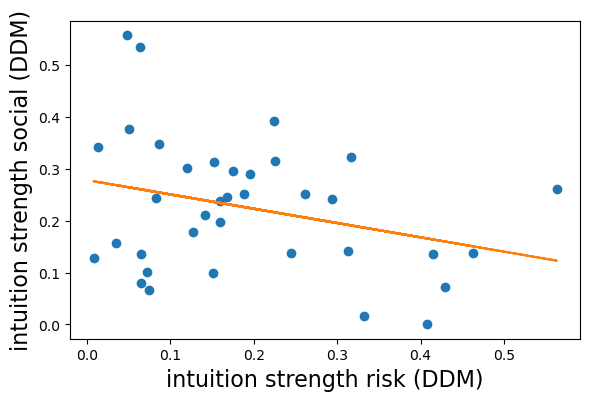

In [180]:
# DDM

x = ddm_risk['x0_abs']
y = ddm_social['x0_abs']

fig, ax = plt.subplots(dpi=dpi)

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

plt.xlabel('intuition strength risk (DDM)', size = label_size)
plt.ylabel('intuition strength social (DDM)', size = label_size)

plt.tight_layout()



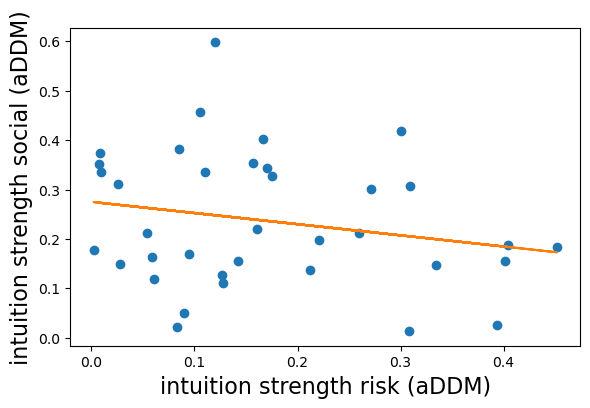

In [181]:
# aDDM

x = addm_risk['x0_abs']
y = addm_social['x0_abs']

fig, ax = plt.subplots(dpi=dpi)

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

plt.xlabel('intuition strength risk (aDDM)', size = label_size)
plt.ylabel('intuition strength social (aDDM)', size = label_size)

plt.tight_layout()



## Paired samples analysis on x0_abs (intuition strength)

In [182]:
# DDM
print(ttest_rel(ddm_risk['x0_abs'], ddm_social['x0_abs']))
print(wilcoxon(ddm_risk['x0_abs'], ddm_social['x0_abs']))

Ttest_relResult(statistic=-0.9432423450232222, pvalue=0.35202284361953406)
WilcoxonResult(statistic=243.0, pvalue=0.15737607169087242)


In [183]:
# aDDM
print(ttest_rel(addm_risk['x0_abs'], addm_social['x0_abs']))
print(wilcoxon(addm_risk['x0_abs'], addm_social['x0_abs']))

Ttest_relResult(statistic=-2.0440236040923407, pvalue=0.04853283844646184)
WilcoxonResult(statistic=210.0, pvalue=0.05331006569764642)


### plotting

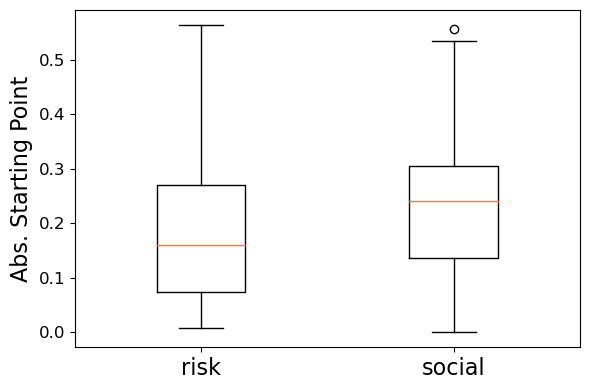

In [184]:
# DDM

# ploTting
columns = [ddm_risk['x0_abs'], ddm_social['x0_abs']]

fig, ax = plt.subplots(dpi=dpi)
ax.boxplot(columns, widths=(0.35, 0.35))
plt.xticks([1, 2], ['risk', 'social'], size = label_size)
plt.yticks(size = tick_size)
plt.ylabel('Abs. Starting Point', size = label_size)

plt.tight_layout()


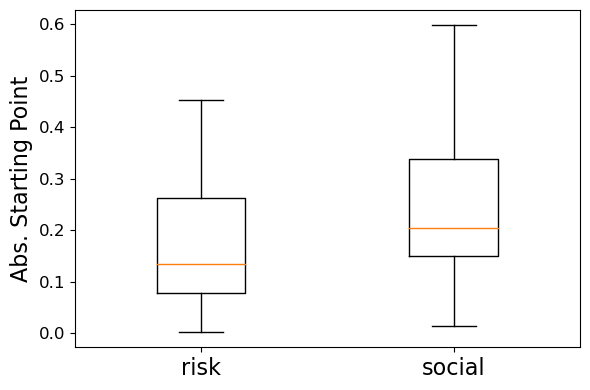

In [185]:
# aDDM

# ploTting
columns = [addm_risk['x0_abs'], addm_social['x0_abs']]

fig, ax = plt.subplots(dpi=dpi)
ax.boxplot(columns, widths=(0.35, 0.35))
plt.xticks([1, 2], ['risk', 'social'], size = label_size)
plt.yticks(size = tick_size)
plt.ylabel('Abs. Starting Point', size = label_size)

plt.tight_layout()



# Likelihood ratio test (LTR) and fitter results for analysis

## LTR for risky decisions

In [186]:
# risky decisions
LRT_risk = -2 * (addm_risk['loss_func_value'] - ddm_risk['loss_func_value'])
LRT_pval_risk = LRT_risk.apply(lambda x : chi2.sf(x, 1)) # 1 degree of freedom 

frame = [ddm_risk['SubjectNumber'], LRT_pval_risk]

compare_risk = pd.concat(frame, axis = 1)

compare_risk.rename(columns={"loss_func_value": "LRT_pval"}, inplace = True)

compare_risk['Not_aDDM'] = np.nan

compare_risk['Not_aDDM'] = compare_risk['LRT_pval'].apply(lambda x: 1 if x > 0.05 else 0)

In [187]:
compare_risk['Not_aDDM'].sum()

4

## LTR for social decisions

In [188]:
# social decisions
LRT_social = -2 * (addm_social['loss_func_value'] - ddm_social['loss_func_value'])
LRT_pval_social = LRT_social.apply(lambda x : chi2.sf(x, 1)) # 1 degree of freedom 

frame = [ddm_social['SubjectNumber'], LRT_pval_social]

compare_social = pd.concat(frame, axis = 1)

compare_social.rename(columns={"loss_func_value": "LRT_pval"}, inplace = True)

compare_social['Not_aDDM'] = np.nan

compare_social['Not_aDDM'] = compare_social['LRT_pval'].apply(lambda x: 1 if x > 0.05 else 0)

In [189]:
compare_social['Not_aDDM'].sum()

8

## DDM datasets based on the LRT results

### risk

In [190]:
# risk

ltr_ddm_risk = pd.DataFrame(columns = ['SubjectNumber', 'x0_abs'])

for i in range(compare_risk.shape[0]):
    SubjectNumber = compare_risk['SubjectNumber'][i]
    
    if compare_risk['Not_aDDM'][i] == 1:
        result_list = [[SubjectNumber, float(ddm_risk['x0_abs'].iloc[np.where(ddm_risk['SubjectNumber'] == SubjectNumber)])]]
    else:
        result_list = [[SubjectNumber, float(addm_risk['x0_abs'].iloc[np.where(addm_risk['SubjectNumber'] == SubjectNumber)])]]
    
    result_df = pd.DataFrame(result_list, columns = ['SubjectNumber', 'x0_abs'])
    
    ltr_ddm_risk = ltr_ddm_risk.append(result_df, ignore_index=True)
    
    
    

In [191]:
print(kstest(ltr_ddm_risk['x0_abs'], 'norm'))
print(ltr_ddm_risk['x0_abs'].mean(), ltr_ddm_risk['x0_abs'].std())


KstestResult(statistic=0.5008532737639951, pvalue=7.0590680388486515e-09)
0.16891498009895103 0.12801482263591432


### social

In [192]:
# social

ltr_ddm_social = pd.DataFrame(columns = ['SubjectNumber', 'x0_abs'])

for i in range(compare_social.shape[0]):
    SubjectNumber = compare_social['SubjectNumber'][i]
    
    if compare_social['Not_aDDM'][i] == 1:
        result_list = [[SubjectNumber, float(ddm_social['x0_abs'].iloc[np.where(ddm_social['SubjectNumber'] == SubjectNumber)])]]
    else:
        result_list = [[SubjectNumber, float(addm_social['x0_abs'].iloc[np.where(addm_social['SubjectNumber'] == SubjectNumber)])]]
    
    result_df = pd.DataFrame(result_list, columns = ['SubjectNumber', 'x0_abs'])
    
    ltr_ddm_social = ltr_ddm_social.append(result_df, ignore_index=True)
    
    

In [193]:
print(kstest(ltr_ddm_social['x0_abs'], 'norm'))
print(ltr_ddm_social['x0_abs'].mean(), ltr_ddm_social['x0_abs'].std())

KstestResult(statistic=0.5063781145205969, pvalue=4.460314767859578e-09)
0.2379276690690731 0.1309302206101211


## Correlational analaysis

In [194]:
# ltr_DDM
print('PearsonrResult', pearsonr(ltr_ddm_risk['x0_abs'], ltr_ddm_social['x0_abs']))
print(spearmanr(ltr_ddm_risk['x0_abs'], ltr_ddm_social['x0_abs']))

PearsonrResult (-0.2753108890143788, 0.10413090069552186)
SpearmanrResult(correlation=-0.22651222651222655, pvalue=0.18402868799820776)


### plotting

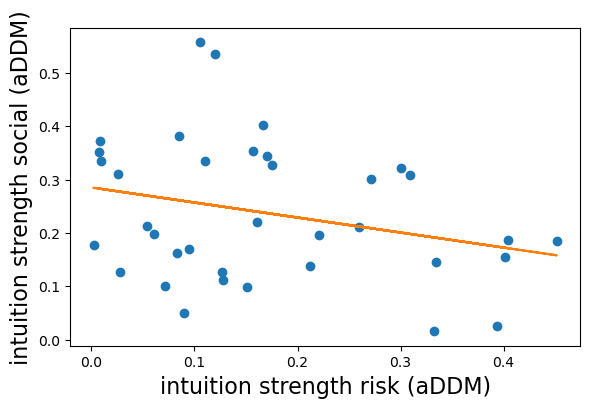

In [195]:
# ltr_DDM

x = ltr_ddm_risk['x0_abs']
y = ltr_ddm_social['x0_abs']

fig, ax = plt.subplots(dpi=dpi)

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

plt.xlabel('intuition strength risk (aDDM)', size = label_size)
plt.ylabel('intuition strength social (aDDM)', size = label_size)

plt.tight_layout()



## Paired samples analysis

In [196]:
# DDM
print(ttest_rel(ltr_ddm_risk['x0_abs'], ltr_ddm_social['x0_abs']))
print(wilcoxon(ltr_ddm_risk['x0_abs'], ltr_ddm_social['x0_abs']))

Ttest_relResult(statistic=-2.0024603284156686, pvalue=0.05303037918830797)
WilcoxonResult(statistic=210.0, pvalue=0.05331006569764642)


### plotting

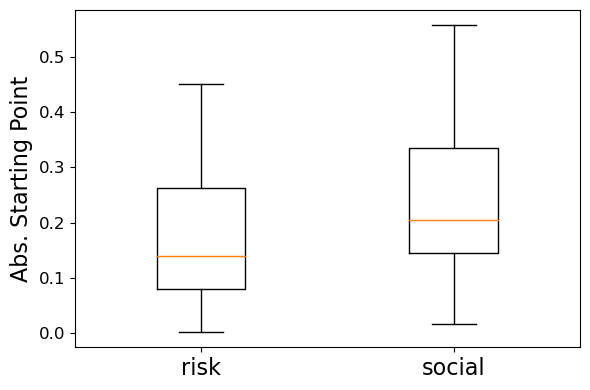

In [197]:
# ltr_DDM

columns = [ltr_ddm_risk['x0_abs'], ltr_ddm_social['x0_abs']]

fig, ax = plt.subplots(dpi=dpi)
ax.boxplot(columns, widths=(0.35, 0.35))
plt.xticks([1, 2], ['risk', 'social'], size = label_size)
plt.yticks(size = tick_size)
plt.ylabel('Abs. Starting Point', size = label_size)

plt.tight_layout()



# Correlation of the cross-domain prefrences by intuitive thinking

## Correlational analysis on x0 


In [198]:
# DDM
print('PearsonrResult', pearsonr(ddm_risk['x0'], ddm_social['x0']))
print(spearmanr(ddm_risk['x0'], ddm_social['x0']))

PearsonrResult (-0.06856341513096798, 0.691123902324391)
SpearmanrResult(correlation=-0.06280566280566281, pvalue=0.7159368325586517)


In [199]:
# aDDM
print('PearsonrResult', pearsonr(addm_risk['x0'], addm_social['x0']))
print(spearmanr(addm_risk['x0'], addm_social['x0']))

PearsonrResult (0.07901787587943007, 0.6468858945971128)
SpearmanrResult(correlation=-0.0030888030888030892, pvalue=0.9857355588070573)


### plotting

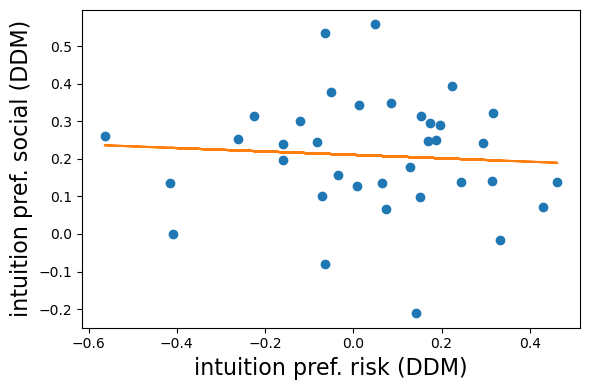

In [200]:
# DDM

x = ddm_risk['x0']
y = ddm_social['x0']

fig, ax = plt.subplots(dpi=dpi)

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

plt.xlabel('intuition pref. risk (DDM)', size = label_size)
plt.ylabel('intuition pref. social (DDM)', size = label_size)

plt.tight_layout()


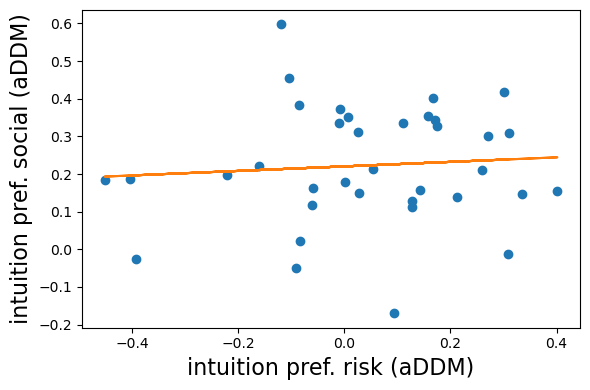

In [201]:
# aDDM

x = addm_risk['x0']
y = addm_social['x0']

fig, ax = plt.subplots(dpi=dpi)

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

plt.xlabel('intuition pref. risk (aDDM)', size = label_size)
plt.ylabel('intuition pref. social (aDDM)', size = label_size)

plt.tight_layout()


# Attentional effect and cross-domain consistency


## one sample t test

In [206]:
# two-tailed
print(ttest_1samp(addm_risk['theta'], popmean=1))
print(ttest_1samp(addm_social['theta'], popmean=1))

Ttest_1sampResult(statistic=-5.6390420532395416, pvalue=2.3099626075563294e-06)
Ttest_1sampResult(statistic=-6.141596058231921, pvalue=5.027670509040817e-07)


In [208]:
# one-tailed
print(ttest_1samp(addm_risk['theta'], popmean=1, alternative='less'))
print(ttest_1samp(addm_social['theta'], popmean=1, alternative='less'))

Ttest_1sampResult(statistic=-5.6390420532395416, pvalue=1.1549813037781647e-06)
Ttest_1sampResult(statistic=-6.141596058231921, pvalue=2.5138352545204083e-07)


## correlational analysis for testing cross-domain consistency 

In [204]:
# aDDM
print('PearsonrResult', pearsonr(addm_risk['theta'], addm_social['theta']))
print(spearmanr(addm_risk['theta'], addm_social['theta']))

PearsonrResult (-0.03848562639759916, 0.8236547239547116)
SpearmanrResult(correlation=0.10913770913770915, pvalue=0.5263331722411144)


### plotting

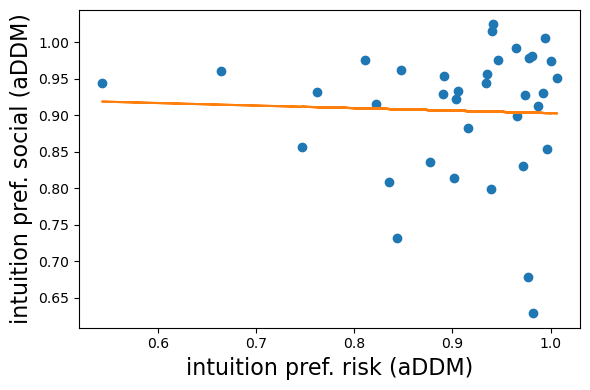

In [205]:
x = addm_risk['theta']
y = addm_social['theta']

fig, ax = plt.subplots(dpi=dpi)

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

plt.xlabel('intuition pref. risk (aDDM)', size = label_size)
plt.ylabel('intuition pref. social (aDDM)', size = label_size)

plt.tight_layout()

